# PROBLEM SET #4: 
# NEURAL NETWORKS PART I

In [2]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from function_approximator import FunctionApproximator

### General note about this problem set:

Neural networks can be a bit of a pain to train well. It takes some trial and error. You need to experimentally try different settings in order to get good performance: a different number of iterations, a different number of hidden units, a different learning rate, et cetera. The point of this problem set is not for you to spend 5000 hours tweaking each and every neural network to get the best possible performance (especially since we're not bothering to do a correct training/test/validation split). Nevertheless, some effort should be made to choose well-performing parameters. Doing so should help demystify neural networks somewhat and help you get past seeing them as magical black boxes. Also the fact that neural networks can (potentially) be tedious to train should be kept in mind before you decide to use them for a given task.

# Problem 1 (20%)

Consider approximating the following two functions defined on the unit interval $[0,1]$:

$$\begin{equation}
f_1(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3) + {\rm tanh}(x^2/3.7)\right)
\end{equation}$$

$$\begin{equation}
f_2(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3)\right)
\end{equation}$$

For each function $f_i(x)$ consider the 101-element training set 

$$\begin{equation}
\mathcal{D}_i = \left\{ x_j, y_j \right\} = \left\{ \frac{j}{100}, \;f_i\left(\frac{j}{100}\right) \right\} \qquad \rm{for} \qquad j=0,1,2,...,99,100
\end{equation}$$




__(a)__ How many hidden units do you need to get a MSE (mean squared error) for $\mathcal{D}_1$ below 0.1? Below 0.001? Below 0.0001?

In [6]:
from function_approximator import FunctionApproximator


def f(x):
    return (np.exp(1.1*(np.sin(2.3*(x**3))**2))+np.tanh((x**2)/3.7))


X = np.linspace(0.1, 1.0, 101).reshape((101,1))
Y = f(X).reshape((101,))

for f in range(10):
    fa = FunctionApproximator(n_out=1, n_hidden=f)
    fa.train(X, Y, learning_rate=0.05, n_epochs=200000, report_frequency=200000)
    Y_pred = fa.get_y_pred()
    Y_pred = Y_pred.reshape((101,))
    w1 = fa.get_weights()
    [w1,b1,w2,b2]=fa.get_weights()



epoch: 200000  cost: 0.597530
epoch: 200000  cost: 0.030331
epoch: 200000  cost: 0.000237
epoch: 200000  cost: 0.000156
epoch: 200000  cost: 0.000152
epoch: 200000  cost: 0.000170
epoch: 200000  cost: 0.000169
epoch: 200000  cost: 0.000172
epoch: 200000  cost: 0.000177
epoch: 200000  cost: 0.000171


__(b)__ How many hidden units do you need to get a MSE for $\mathcal{D}_2$ below 0.1? Below 0.001? Below 0.0001?

In [7]:
from function_approximator import FunctionApproximator


def f(x):
    return np.exp(1.1*(np.sin(2.3*((x**3))**2)))

X = np.linspace(0.1,1.0, 101).reshape((101,1))
Y = f(X).reshape((101,))



for i in range(10):
    fa = FunctionApproximator(n_out=1, n_hidden=i)
    fa.train(X, Y, learning_rate=0.05, n_epochs=200000, report_frequency=200000)
    Y_pred = fa.get_y_pred()
    w1 = fa.get_weights()
    [w1,b1,w2,b2]=fa.get_weights()



epoch: 200000  cost: 0.422175
epoch: 200000  cost: 0.010282
epoch: 200000  cost: 0.001387
epoch: 200000  cost: 0.002808
epoch: 200000  cost: 0.000854
epoch: 200000  cost: 0.000735
epoch: 200000  cost: 0.001713
epoch: 200000  cost: 0.003091
epoch: 200000  cost: 0.001882
epoch: 200000  cost: 0.009646


# Problem 2 (45%)

In the lecture notebook we noted that without regularization a neural network might take on weights with extreme values. In this problem we want to explore a bit more how/when this might happen. We are again considering function approximation on the unit interval, as above. We want to consider a function $f(x)$ that also has its range contained in the unit interval as well, i.e.

$$\begin{equation}
f: [0,1] \to [0,1]
\end{equation}$$

Your goal is to construct a medium-sized dataset $\mathcal{D}$ [say with $\mathcal{O}(10-100)$ elements] that leads to a neural network with extreme weights in the weight matrix $\bf W^{(1)}$ after training. So you need to explicitly construct a dataset of the form

$$\begin{equation}
\mathcal{D} = \left\{ x_j, y_j \right\} 
\end{equation}$$

where $x_j, y_j \in [0,1]$ for all $x_j, y_j$. Choose the number of hidden units as you wish. 

_Specifically your goal is to choose $\mathcal{D}$ such that the largest element of $\bf W^{(1)}$ is larger than 25 in absolute value._ (If you can't reach 25 do the best you can)











__(a)__ Construct the dataset and print it out. 

_Tips: Consider different numbers of hidden units. Consider datasets that have some of the $x_j$ very close together. Consider datasets where the implicit function $f(x)$ behind $y_j = f(x_j)$ varies rapidly as a function of $x$. Make sure you train long enough. (These are not necessary conditions but they might help you achieve your goal)_


In [90]:
def f(x):
    return  (np.sin((.5*x)*10)**20)


X = np.linspace(0.1, 1.0, 101).reshape((101,1))
Y = f(X).reshape((101,))

In [91]:
print(X)
print(Y)

[[ 0.1  ]
 [ 0.109]
 [ 0.118]
 [ 0.127]
 [ 0.136]
 [ 0.145]
 [ 0.154]
 [ 0.163]
 [ 0.172]
 [ 0.181]
 [ 0.19 ]
 [ 0.199]
 [ 0.208]
 [ 0.217]
 [ 0.226]
 [ 0.235]
 [ 0.244]
 [ 0.253]
 [ 0.262]
 [ 0.271]
 [ 0.28 ]
 [ 0.289]
 [ 0.298]
 [ 0.307]
 [ 0.316]
 [ 0.325]
 [ 0.334]
 [ 0.343]
 [ 0.352]
 [ 0.361]
 [ 0.37 ]
 [ 0.379]
 [ 0.388]
 [ 0.397]
 [ 0.406]
 [ 0.415]
 [ 0.424]
 [ 0.433]
 [ 0.442]
 [ 0.451]
 [ 0.46 ]
 [ 0.469]
 [ 0.478]
 [ 0.487]
 [ 0.496]
 [ 0.505]
 [ 0.514]
 [ 0.523]
 [ 0.532]
 [ 0.541]
 [ 0.55 ]
 [ 0.559]
 [ 0.568]
 [ 0.577]
 [ 0.586]
 [ 0.595]
 [ 0.604]
 [ 0.613]
 [ 0.622]
 [ 0.631]
 [ 0.64 ]
 [ 0.649]
 [ 0.658]
 [ 0.667]
 [ 0.676]
 [ 0.685]
 [ 0.694]
 [ 0.703]
 [ 0.712]
 [ 0.721]
 [ 0.73 ]
 [ 0.739]
 [ 0.748]
 [ 0.757]
 [ 0.766]
 [ 0.775]
 [ 0.784]
 [ 0.793]
 [ 0.802]
 [ 0.811]
 [ 0.82 ]
 [ 0.829]
 [ 0.838]
 [ 0.847]
 [ 0.856]
 [ 0.865]
 [ 0.874]
 [ 0.883]
 [ 0.892]
 [ 0.901]
 [ 0.91 ]
 [ 0.919]
 [ 0.928]
 [ 0.937]
 [ 0.946]
 [ 0.955]
 [ 0.964]
 [ 0.973]
 [ 0.982]
 [ 0.991]


__(b)__ Train the neural network and plot the resulting dataset and the function approximation yielded by the neural network.

epoch: 200000  cost: 0.021854
epoch: 400000  cost: 0.010495
epoch: 600000  cost: 0.008769
epoch: 800000  cost: 0.007516
epoch: 1000000  cost: 0.006663
epoch: 1200000  cost: 0.006082
epoch: 1400000  cost: 0.005672
epoch: 1600000  cost: 0.005373
epoch: 1800000  cost: 0.005147
epoch: 2000000  cost: 0.004971


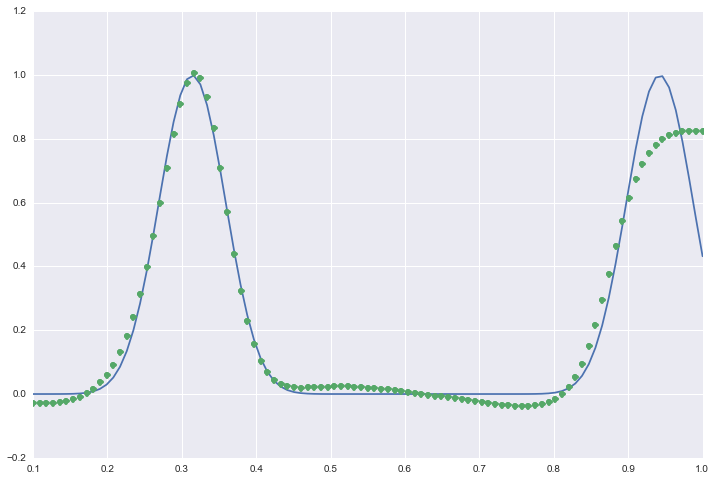

In [92]:
from function_approximator import FunctionApproximator
fa = FunctionApproximator(n_out=1, n_hidden=5)

fa.train(X, Y, learning_rate=0.05, n_epochs=2000000, report_frequency=200000)
Y_pred = fa.get_y_pred()
fig = plt.figure(figsize=[12,8])
plt.plot(X, Y);
plt.plot(X, Y_pred, 'o');


__(c)__ Use the get_weights function to demonstrate that your $\bf W^{(1)}$ does in fact have extreme weights. What's the largest weight in absolute value?

[ _to access the weights after training use something like_: [w1, b1, w2, b2] = fa.get_weights() ]

In [93]:
w1 = fa.get_weights()
[w1,b1,w2,b2]=fa.get_weights()
print("w1:", [w1])
#print("b1:", b1)
#print("w2:", w2)
#print("b2:", b2)

w1: [array([[-17.12974753,   0.98365298,   0.11205765,  14.7721708 ,
         20.59122848]])]


__(d)__ Explain the properties of your dataset that led to these extreme weights. 

The weights are found using gradient descent. They are finding the local minimum and then moving on. However, the local minumum that they find are possibly incorrect and the steps to get there were too big and too fast. 


__(e)__ Add a regularizer to your neural network and retrain on the same dataset. Plot the new function approximation and demonstrate that the weights become less extreme.

epoch: 200000  cost: 0.115126
epoch: 400000  cost: 0.115126
epoch: 600000  cost: 0.115126
epoch: 800000  cost: 0.115126
epoch: 1000000  cost: 0.115126
epoch: 1200000  cost: 0.115126
epoch: 1400000  cost: 0.115126
epoch: 1600000  cost: 0.115126
epoch: 1800000  cost: 0.115126
epoch: 2000000  cost: 0.115126
w1: [array([[ -4.17691782e-01,   2.11051656e-14]]), array([[ -3.93711271e-01],
       [  2.44064462e-14]])]


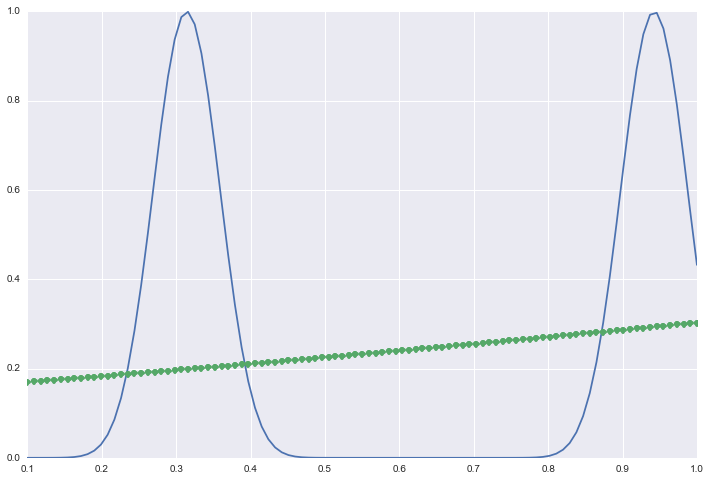

In [108]:
fa = FunctionApproximator(n_out=1, n_hidden=2)
fa.train(X, Y, learning_rate=0.05, n_epochs=2000000, report_frequency=200000, lambda_l2=0.005)
Y_pred = fa.get_y_pred()
fig = plt.figure(figsize=[12,8])
plt.plot(X, Y);
plt.plot(X, Y_pred, 'o');

w2 = fa.get_weights()
[w2,b1,w3,b2]=fa.get_weights()
print("w1:", [w2,w3])

<br>
<br>
<br>
# Problem 3 (35%)

In the lecture notebook we used a 2-layer neural network (1 hidden layer) to classify the scikit learn "moon data"

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


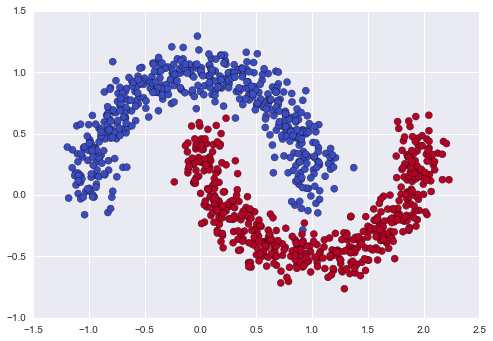

In [9]:
### use the exact dataset below for this problem
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
np.random.seed(0)
X3, Y3 = make_moons(1000, noise=0.11)
plt.scatter(X3[:,0], X3[:,1], s=50, c=Y3, cmap=plt.cm.get_cmap('coolwarm', 2));

In order to get decent separation between the red and blue points we needed several hidden units. Here we want to see what kind of classification error we can get if we _first process the data with Kernel PCA_.

__(a)__ When you use the 2-layer neural classifier on this dataset (just like in the lecture notebook) what's the best test performance you can get when using no more than 10 hidden units? Plot the resulting decision boundary. (Note that we just set the test set equal to the training set)


using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 49.724972 %
epoch 223, minibatch 2/9, test error of best model 49.724972 %
epoch 445, minibatch 4/9, validation error 49.724972 %
epoch 667, minibatch 6/9, validation error 49.724972 %
Optimization complete with best validation score of 49.724972 %,with test performance 49.724972 %
The code ran for 889 epochs, with 1583.375234 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 12.761276 %
epoch 223, minibatch 2/9, test error of best model 12.761276 %
epoch 445, minibatch 4/9, validation error 12.431243 %
epoch 445, minibatch 4/9, test error of best model 12.431243 %
epoch 667, minibatch 6/9, validation error 12.761276 %
epoch 889, minibatch 8/9, validation error 12.761276 %
epoch 1112, minibatch 1/9, vali

The code for file neural_classifier.pyc ran for 0.6s
The code for file neural_classifier.pyc ran for 1.4s


The code ran for 1778 epochs, with 1248.567472 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 12.651265 %
epoch 223, minibatch 2/9, test error of best model 12.651265 %
epoch 445, minibatch 4/9, validation error 12.761276 %
epoch 667, minibatch 6/9, validation error 12.871287 %
Optimization complete with best validation score of 12.651265 %,with test performance 12.651265 %


The code for file neural_classifier.pyc ran for 0.7s


The code ran for 889 epochs, with 1296.905278 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 12.541254 %
epoch 223, minibatch 2/9, test error of best model 12.541254 %
epoch 445, minibatch 4/9, validation error 12.431243 %
epoch 445, minibatch 4/9, test error of best model 12.431243 %
epoch 667, minibatch 6/9, validation error 12.761276 %
epoch 889, minibatch 8/9, validation error 12.761276 %
epoch 1112, minibatch 1/9, validation error 12.761276 %
epoch 1334, minibatch 3/9, validation error 12.761276 %
epoch 1556, minibatch 5/9, validation error 12.541254 %
Optimization complete with best validation score of 12.431243 %,with test performance 12.431243 %


The code for file neural_classifier.pyc ran for 1.2s


The code ran for 1778 epochs, with 1439.896391 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 2.970297 %
epoch 223, minibatch 2/9, test error of best model 2.970297 %
epoch 445, minibatch 4/9, validation error 0.440044 %
epoch 445, minibatch 4/9, test error of best model 0.440044 %
epoch 667, minibatch 6/9, validation error 0.220022 %
epoch 667, minibatch 6/9, test error of best model 0.220022 %
epoch 889, minibatch 8/9, validation error 0.330033 %
epoch 1112, minibatch 1/9, validation error 0.330033 %
epoch 1334, minibatch 3/9, validation error 0.330033 %
epoch 1556, minibatch 5/9, validation error 0.220022 %
epoch 1778, minibatch 7/9, validation error 0.220022 %
epoch 2000, minibatch 9/9, validation error 0.220022 %
epoch 2223, minibatch 2/9, validation error 0.220022 %
epoch 2445, minibatch 4/9, validation error 0.220022 %
Optimization complete with best va


The code for file neural_classifier.pyc ran for 3.1s


The code ran for 2667 epochs, with 854.995171 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 3.300330 %
epoch 223, minibatch 2/9, test error of best model 3.300330 %
epoch 445, minibatch 4/9, validation error 0.330033 %
epoch 445, minibatch 4/9, test error of best model 0.330033 %
epoch 667, minibatch 6/9, validation error 0.220022 %
epoch 667, minibatch 6/9, test error of best model 0.220022 %
epoch 889, minibatch 8/9, validation error 0.330033 %
epoch 1112, minibatch 1/9, validation error 0.330033 %
epoch 1334, minibatch 3/9, validation error 0.330033 %
epoch 1556, minibatch 5/9, validation error 0.220022 %
epoch 1778, minibatch 7/9, validation error 0.220022 %
epoch 2000, minibatch 9/9, validation error 0.220022 %
epoch 2223, minibatch 2/9, validation error 0.220022 %
epoch 2445, minibatch 4/9, validation error 0.220022 %
Optimization complete with best val


The code for file neural_classifier.pyc ran for 1.9s


The code ran for 2667 epochs, with 1413.126822 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 2.420242 %
epoch 223, minibatch 2/9, test error of best model 2.420242 %
epoch 445, minibatch 4/9, validation error 0.440044 %
epoch 445, minibatch 4/9, test error of best model 0.440044 %
epoch 667, minibatch 6/9, validation error 0.220022 %
epoch 667, minibatch 6/9, test error of best model 0.220022 %
epoch 889, minibatch 8/9, validation error 0.220022 %
epoch 1112, minibatch 1/9, validation error 0.330033 %
epoch 1334, minibatch 3/9, validation error 0.330033 %
epoch 1556, minibatch 5/9, validation error 0.220022 %
epoch 1778, minibatch 7/9, validation error 0.220022 %
epoch 2000, minibatch 9/9, validation error 0.220022 %
epoch 2223, minibatch 2/9, validation error 0.220022 %
epoch 2445, minibatch 4/9, validation error 0.220022 %
Optimization complete with best va


The code for file neural_classifier.pyc ran for 2.6s


The code ran for 2667 epochs, with 1030.999526 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 2.860286 %
epoch 223, minibatch 2/9, test error of best model 2.860286 %
epoch 445, minibatch 4/9, validation error 0.880088 %
epoch 445, minibatch 4/9, test error of best model 0.880088 %
epoch 667, minibatch 6/9, validation error 0.440044 %
epoch 667, minibatch 6/9, test error of best model 0.440044 %
epoch 889, minibatch 8/9, validation error 0.220022 %
epoch 889, minibatch 8/9, test error of best model 0.220022 %
epoch 1112, minibatch 1/9, validation error 0.220022 %
epoch 1334, minibatch 3/9, validation error 0.220022 %
epoch 1556, minibatch 5/9, validation error 0.220022 %
epoch 1778, minibatch 7/9, validation error 0.330033 %
epoch 2000, minibatch 9/9, validation error 0.220022 %
epoch 2223, minibatch 2/9, validation error 0.220022 %
epoch 2445, minibatch 4/9, 


The code for file neural_classifier.pyc ran for 4.6s


The code ran for 3556 epochs, with 777.476940 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 5.060506 %
epoch 223, minibatch 2/9, test error of best model 5.060506 %
epoch 445, minibatch 4/9, validation error 0.990099 %
epoch 445, minibatch 4/9, test error of best model 0.990099 %
epoch 667, minibatch 6/9, validation error 0.440044 %
epoch 667, minibatch 6/9, test error of best model 0.440044 %
epoch 889, minibatch 8/9, validation error 0.220022 %
epoch 889, minibatch 8/9, test error of best model 0.220022 %
epoch 1112, minibatch 1/9, validation error 0.220022 %
epoch 1334, minibatch 3/9, validation error 0.220022 %
epoch 1556, minibatch 5/9, validation error 0.330033 %
epoch 1778, minibatch 7/9, validation error 0.330033 %
epoch 2000, minibatch 9/9, validation error 0.220022 %
epoch 2223, minibatch 2/9, validation error 0.220022 %
epoch 2445, minibatch 4/9, v


The code for file neural_classifier.pyc ran for 3.1s


The code ran for 3556 epochs, with 1158.177143 epochs/sec
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 223, minibatch 2/9, validation error 2.970297 %
epoch 223, minibatch 2/9, test error of best model 2.970297 %
epoch 445, minibatch 4/9, validation error 0.880088 %
epoch 445, minibatch 4/9, test error of best model 0.880088 %
epoch 667, minibatch 6/9, validation error 0.330033 %
epoch 667, minibatch 6/9, test error of best model 0.330033 %
epoch 889, minibatch 8/9, validation error 0.220022 %
epoch 889, minibatch 8/9, test error of best model 0.220022 %
epoch 1112, minibatch 1/9, validation error 0.220022 %
epoch 1334, minibatch 3/9, validation error 0.220022 %
epoch 1556, minibatch 5/9, validation error 0.220022 %
epoch 1778, minibatch 7/9, validation error 0.330033 %
epoch 2000, minibatch 9/9, validation error 0.330033 %
epoch 2223, minibatch 2/9, validation error 0.220022 %
epoch 2445, minibatch 4/9, 


The code for file neural_classifier.pyc ran for 3.3s


The code ran for 3556 epochs, with 1094.147104 epochs/sec


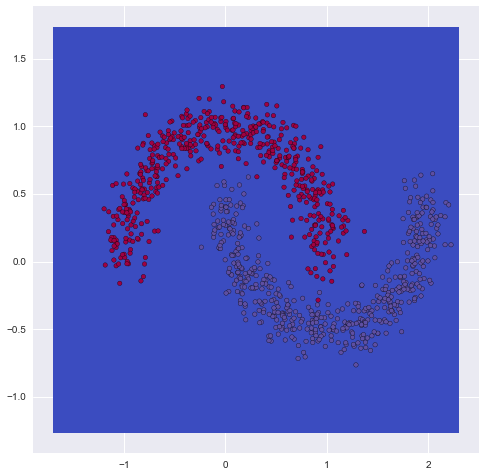

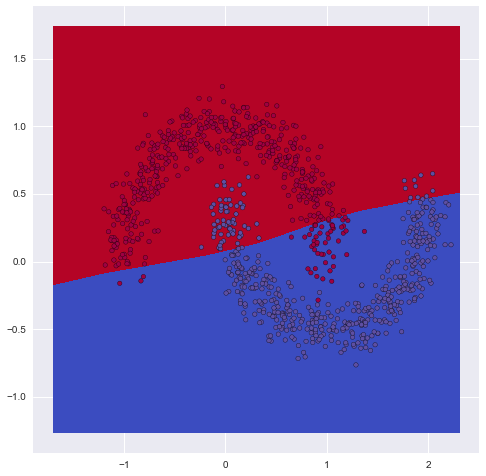

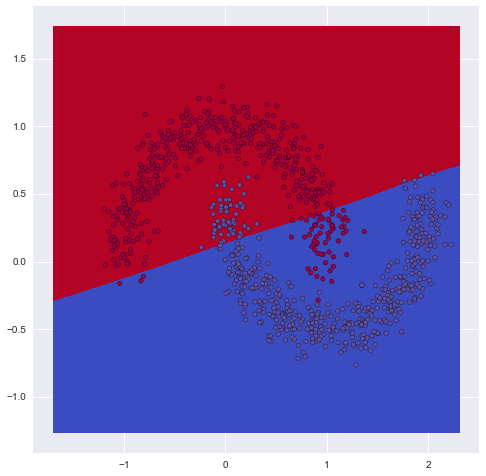

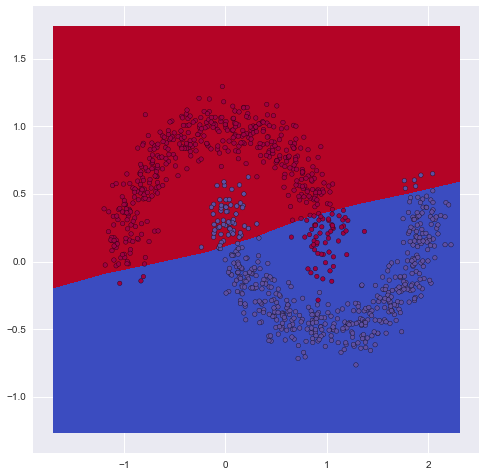

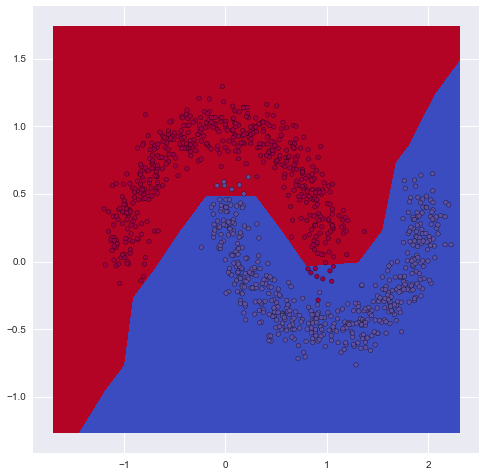

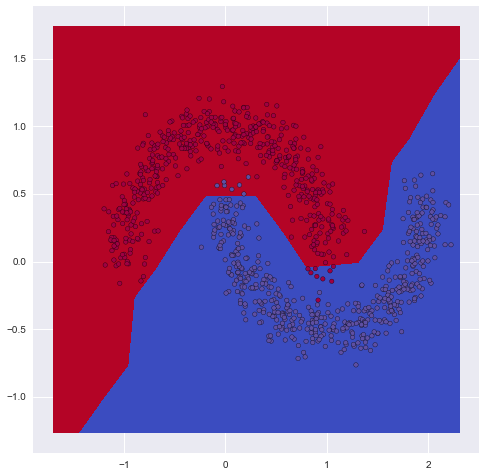

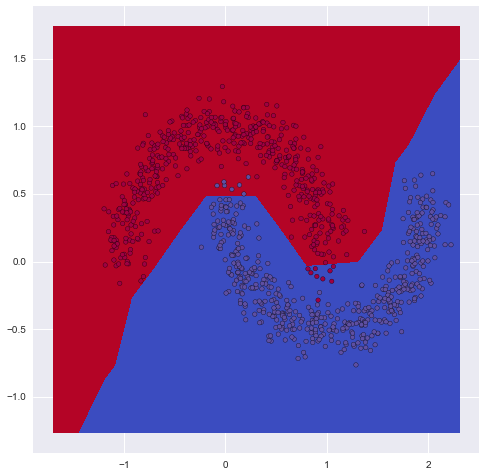

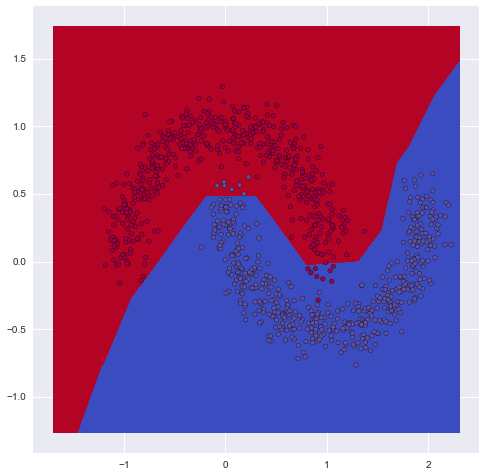

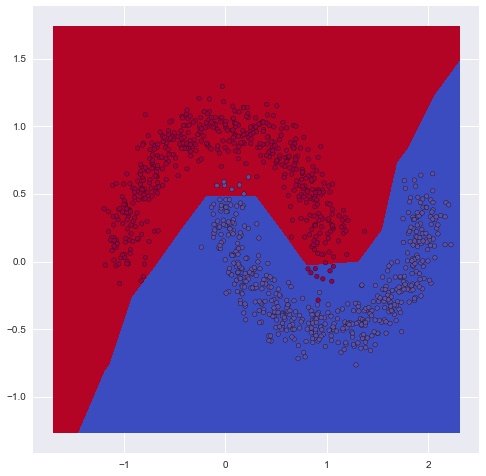

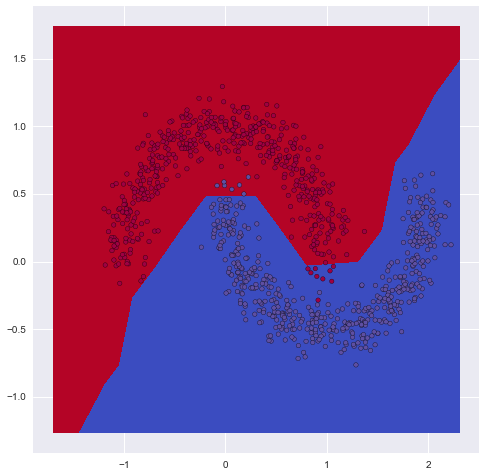

In [10]:
from neural_classifier import neural_classifier

nc1 = neural_classifier()
for i in range(10):
    nc1.train(learning_rate=0.1, n_epochs=40000,
              X_train=X3, Y_train=Y3, batch_size=len(Y), print_frequency=2000,
              n_in=2, n_out=2, n_hidden=i, n_layers=2)
    nc1.plot_decision_boundary(plt, X3, Y3)

If you judge define the best test performace based on the validation score then, with 5-10 hidden units you see the best performaces. They do the best job at classifying the data set. 


__(b)__ What kind of classification performance can you get if you _first_ transform the data using Kernel PCA and _then_ run a 2-layer neural classifier on the transformed data? What's the minimum number of hidden units you need to outperform the classifier in part (a)? What kernel and kernel settings did you use? How well can you do if you only use a _single_ hidden unit in the neural network? _Note: you needn't and/or may not want to use all the components of the kernel transformation._

In [11]:
kernel_pca = KernelPCA(n_components=4, degree=2, gamma=.000001, coef0=120)
Xproj = kernel_pca.fit_transform(X3)

In [12]:
Xproj.shape

(1000, 4)

In [13]:
print (Y3.shape)
print (X3.shape)

(1000,)
(1000, 2)


In [18]:
nc2 = neural_classifier()

nc2.train(learning_rate=0.1, n_epochs=40000,
          X_train=Xproj, Y_train=Y3, batch_size=len(Y3), print_frequency=2000,
          n_in=4, n_out=2, n_hidden=1, n_layers=2)

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 12.700000 %
epoch 2000, minibatch 1/1, test error of best model 12.700000 %
epoch 4000, minibatch 1/1, validation error 12.700000 %
epoch 6000, minibatch 1/1, validation error 12.700000 %
Optimization complete with best validation score of 12.700000 %,with test performance 12.700000 %
The code ran for 7997 epochs, with 6839.806271 epochs/sec


The code for file neural_classifier.pyc ran for 1.2s


In [19]:
nc2 = neural_classifier()

nc2.train(learning_rate=0.1, n_epochs=40000,
          X_train=Xproj, Y_train=Y3, batch_size=len(Y3), print_frequency=2000,
          n_in=4, n_out=2, n_hidden=5, n_layers=2)

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 2.200000 %
epoch 2000, minibatch 1/1, test error of best model 2.200000 %
epoch 4000, minibatch 1/1, validation error 0.700000 %
epoch 4000, minibatch 1/1, test error of best model 0.700000 %
epoch 6000, minibatch 1/1, validation error 0.300000 %
epoch 6000, minibatch 1/1, test error of best model 0.300000 %
epoch 8000, minibatch 1/1, validation error 0.200000 %
epoch 8000, minibatch 1/1, test error of best model 0.200000 %
epoch 10000, minibatch 1/1, validation error 0.300000 %
epoch 12000, minibatch 1/1, validation error 0.300000 %
epoch 14000, minibatch 1/1, validation error 0.200000 %
epoch 16000, minibatch 1/1, validation error 0.200000 %
epoch 18000, minibatch 1/1, validation error 0.200000 %
epoch 20000, minibatch 1/1, validation error 0.200000 %
epoch 22000, minibatch 1/1, validation error 0.200000 %
epoch 24000, min

The code for file neural_classifier.pyc ran for 9.4s


Using 1 hidden layer the classification performance is ok. The number of hidden units that it takes to out perform the classification performace in the first example is 5. 